<a href="https://colab.research.google.com/github/EvaKelesidis/Bleichenbacher-optimisation/blob/main/Laborator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<p> <b>Exercitiul 1</b> </p>
Dorim sa simulam aruncarea cu o moneda echilibrata. Consideram $H \equiv 1, T \equiv 0$.
<ol>
   <p> 1.Folosind functia numpy.random.randinit, generati un sir de $N=10000$ de experimente; </p>
      <p> 2.Ilustrati faptul ca pe masura ce efectuam mai multe experimente, $P = \text{nr de aparitii ale lui H}/\text{nr de simulari} \longrightarrow 1/2$.</p>
    </ol>

Enter a number: 1000


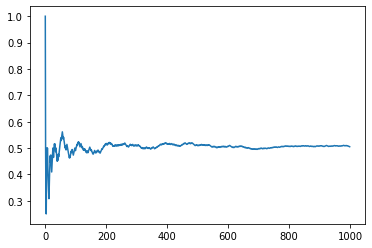

In [7]:
#@title Solutie

def coins(N):
  a = np.random.randint(2, size = N)
  P_H = np.cumsum(a)
  P = np.divide(P_H, range(1, N+1))
  plt.plot(P)
  
def main():
  N = int(input("Enter a number: "))
  coins(N)
  
if __name__=="__main__":
  main()


<p> <b>Exercitiul 2</b> </p>
La fel ca la <b>Exercitiul 1</b>, pentru aruncarea cu zarul.

Enter a number: 10000
0.16666666666666666


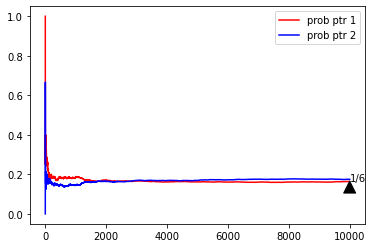

<Figure size 480x320 with 0 Axes>

In [15]:
#@title Solutie

def dice(N):
  a = np.random.randint(1, 7, size = N)
 
  P_1 = [list(a[0:i]).count(1) for i in range(1, len(a) + 1)]
  P_1 = np.divide(P_1, range(1, N + 1))
  P_2 = [list(a[0:i]).count(2) for i in range(1, len(a) + 1)]
  P_2 = np.divide(P_2, range(1, N + 1))
 
  fig, ax = plt.subplots()
  figure(figsize = (6, 4), dpi=80)
  ax.annotate('1/6', 
            xy=(10000, 1/6), 
            xytext=(10000, 1/6), 
            arrowprops = dict(facecolor='black', shrink=0.05))
  ax.plot(range(N), P_1, color = 'red', label = 'prob ptr 1')
  ax.plot(range(N), P_2, color = 'blue', label = 'prob ptr 2')

  ax.legend()

def main():
  N = int(input("Enter a number: "))
  dice(N)
  print(1/6)
 
if __name__=="__main__":
  main()


<p> <b>Exercitiul 3</b> </p>
Un sir de numere $x=[x_1, x_2,...,x_n], 0 \leq x_i \leq 1$ se numeste distribuit uniform pe $[0, 1]$ daca $\frac{\#x_i \in (a, b)}{n} \approx b-a, \forall (a, b) \subseteq [0, 1]$. Desigur, $b-a$ trebuie sa fie rezonabil in raport cu $n$ (numarul de sample-uri). Instructiunea random.uniform(0, 1, size=n) genereaza astfel de sir in Python. 
Pentru diverse valori ale lui $n$ si ale lui $b-a$, verificati ca sirul este intr-adevar uniform;

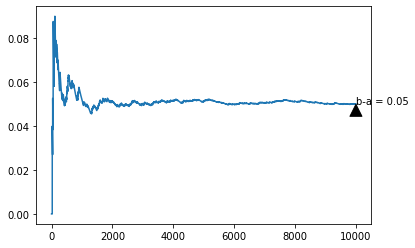

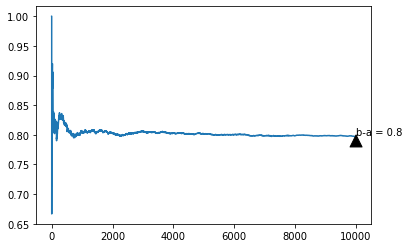

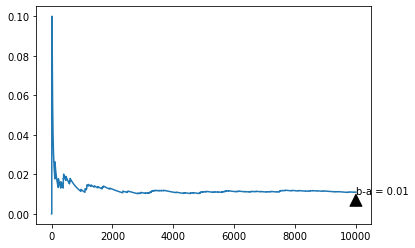

In [18]:
#@title Solutie
def count(a, b, v):
	ctr = 0
	for i in v:
		if i > a and i < b:
			ctr += 1
	return ctr

def coins(N, l, r):
    P = []
    a = np.random.uniform(0, 1, size = N)
    for i in range(1, N + 1):
    	P.append(count(l, r, a[0:i])/i)
    fig, ax = plt.subplots()
    ax.annotate('b-a = ' + str(round(r-l, 2)), 
            xy=(10000, r - l), 
            xytext=(10000, r - l), 
            arrowprops = dict(facecolor='black', shrink=0.05))
    ax.plot(range(N), P)

def main():
    N = 10000
    l = 0.1
    r = 0.15
    coins(N, l, r)
    l = 0.1
    r = 0.9
    coins(N, l, r)
    l = 0.5
    r = 0.51
    coins(N, l, r)
    
if __name__ == "__main__":
    main()


<p> <b> Exercitiul 4 </b> </p>

Am vazut ca random.uniform genereaza un numar aleator uniform in $[0, 1]$. De exemplu daca generam sirul $x=\text{random.uniform}(0, 1, N)$ si $N$ e mare, atunci $P(x \in (a, b)) = \frac{\#(a < x_i < b)}{N} \approx b-a$. Folositi random.uniform pentru a simula $N$ aruncari cu o moneda masluita. 
De exemplu, $P(H) = p = 0.7, P(T) = q = 0.3$, si atunci vom considera "moneda masluita" astfel: $H \equiv 1$ pica cand $x_N < 0.7$ si $T \equiv 0$ pica cand $x_N \geq 0.7$.



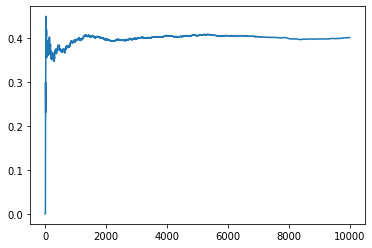

In [20]:
#@title Solutie

def coins(N, p):
    P = []
    P_B = []
    B = np.random.uniform(0, 1, size = N)
    for i in range(N):
       B[i] = 1 * (B[i] < p)
    P_B = np.cumsum(B)
    P = np.divide(P_B, range(1, N + 1))
    plt.plot(P)
    plt.show()
    
def main():
    coins(10000, 0.40)
if __name__ == "__main__":
    main()

